## What art style is it?

In [ ]:
#NB: Kaggle requires phone verification to use the internet or a GPU. If you haven't done that yet, the cell below will fail
#    This code is only here to check that your internet is enabled. It doesn't do anything else.
#    Here's a help thread on getting your phone number verified: https://www.kaggle.com/product-feedback/135367

import socket,warnings
try:
    socket.setdefaulttimeout(1)
    socket.socket(socket.AF_INET, socket.SOCK_STREAM).connect(('1.1.1.1', 53))
except socket.error as ex: raise Exception("STOP: No internet. Click '>|' in top right and set 'Internet' switch to on")

The basic steps we'll take are:

1. Connect dataset of different art styles
1. Load the data via data loaders
1. Train the model
1. Results!

## Step 1: Connect dataset of different art styles

View all folders in the dataset ⬇️

In [20]:
import os

# List all folders in the /kaggle/input directory
for dirname, _, filenames in os.walk('/kaggle/input'):
    print(dirname)

/kaggle/input
/kaggle/input/ai-art-critic
/kaggle/input/ai-art-critic/Impressionism
/kaggle/input/ai-art-critic/Hyperrealism
/kaggle/input/ai-art-critic/Surrealism
/kaggle/input/ai-art-critic/Cubism


See what images are in the Art Critic Source Data folder ⬇️

In [12]:
from pathlib import Path

path = Path('/kaggle/input/ai-art-critic')

for subfolder in path.iterdir():
    print(f"📁 Folder: {subfolder}")
    for img in subfolder.glob("*"):
        print("   🖼️", img.name)


📁 Folder: /kaggle/input/ai-art-critic/Impressionism
   🖼️ Impressionism2.jpg
   🖼️ Impressionism4.jpg
   🖼️ Impressionism3.jpg
   🖼️ Impressionism5.webp
   🖼️ Impressionism1.jpg
📁 Folder: /kaggle/input/ai-art-critic/Hyperrealism
   🖼️ Hyperrealism1.jpg
   🖼️ Hyperrealism2.jpg
   🖼️ Hyperrealism3.jpeg
   🖼️ Hyperrealism4.jpg
   🖼️ Hyperrealism5.jpeg
📁 Folder: /kaggle/input/ai-art-critic/Surrealism
   🖼️ Surrealism4.jpg
   🖼️ Surrealism3.png
   🖼️ Surrealism1.jpg
   🖼️ Surrealism2.png
   🖼️ Surrealism5.jpg
📁 Folder: /kaggle/input/ai-art-critic/Cubism
   🖼️ Cubism5.jpg
   🖼️ Cubism3.jpg.webp
   🖼️ Cubism4.jpg
   🖼️ Cubism2.jpg
   🖼️ Cubism1.jpg


Examine the contents of my dataset (below) ⬇️

In [18]:
from fastai.vision.all import get_image_files

files = get_image_files(path)
print(f"Found {len(files)} images")

Found 18 images


## Step 2: Load our data

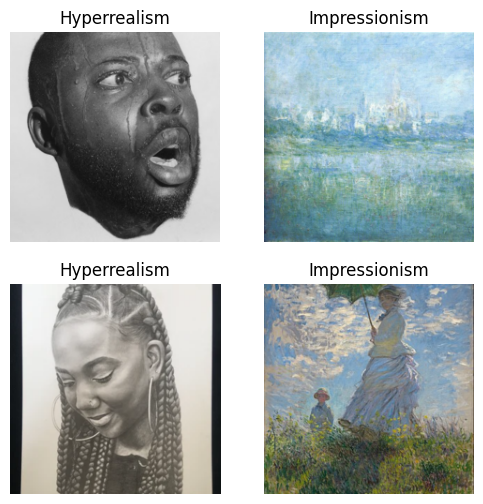

In [19]:
from fastai.vision.all import *

path = Path('/kaggle/input/ai-art-critic')

dls = ImageDataLoaders.from_folder(
    path,#Looks inside path for subfolders
    valid_pct=0.2, #tells Fastai to: Use 80% of images for training, Use 20% of images for validation
    seed=42,#Ensures that the random split between training and validation is reproducible every time I run it.
    item_tfms=Resize(224),#transformation applied to each image before it's used in training: It resizes all images to 224×224 pixels. This is a common standard size for models
    bs=4 #sets the batch size — how many images are passed to the model at once during training. Lowering it to 4 helps when the dataset is small. Default is often 64
)
dls.show_batch() #Displays a grid of sample images from the dataset, along with their labels

## Step 3: Train our model

Now we're ready to train our model. The fastest widely used computer vision model is `resnet18`. You can train this in a few minutes, even on a CPU! (On a GPU, it generally takes under 10 seconds...)

`fastai` comes with a helpful `fine_tune()` method which automatically uses best practices for fine tuning a pre-trained model, so we'll use that.

In [21]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 205MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,3.015391,1.953379,1.000000,00:01


epoch,train_loss,valid_loss,error_rate,time
0,1.918715,1.577027,0.666667,00:01
1,2.714693,1.449189,0.333333,00:00
2,2.202782,1.078556,0.333333,00:00


Generally when I run this I see 100% accuracy on the validation set (although it might vary a bit from run to run).

"Fine-tuning" a model means that we're starting with a model someone else has trained using some other dataset (called the *pretrained model*), and adjusting the weights a little bit so that the model learns to recognise your particular dataset. In this case, the pretrained model was trained to recognise photos in *imagenet*, and widely-used computer vision dataset with images covering 1000 categories) For details on fine-tuning and why it's important, check out the [free fast.ai course](https://course.fast.ai/).

## Result: Data set is too small to create meaningful predictions. But let's test on new images!

Use download_url from Fastai ⬇️

<Axes: >

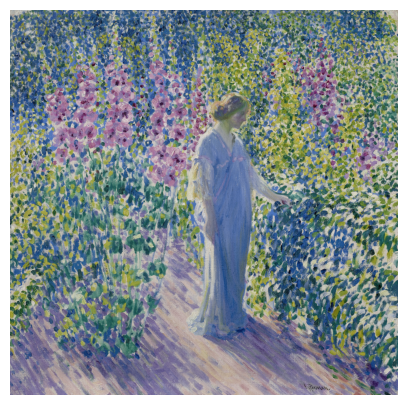

In [43]:
from fastdownload import download_url
from fastai.vision.all import *

# Replace url with test image
url = 'https://www.christies.com/-/jssmedia/images/features/articles/evergreen/amp-collecting-guide-refresh-2024/72867914-rs_2400-dotcom-jpeg.jpg?h=2386&iar=0&w=2400&rev=d2409a371b704339aa5d91badc4c00c0&hash=cb2c16ce0bc5c9e2f7a6aa16dc551eb2cf51b086' 

# Download it to a file
image_path = download_url(url, dest='/kaggle/working/test.jpg')

# Load the image
img = PILImage.create(image_path)

# Show the image
img.show()

In [44]:
pred_class, pred_idx, probs = learn.predict(img)
print(f"Prediction: {pred_class}")
print(f"Confidence: {probs[pred_idx]:.4f}")

Prediction: Impressionism
Confidence: 0.7284


Good job, resnet18. :)

So, as you see, in the space of a few years, creating computer vision classification models has gone from "so hard it's a joke" to "trivially easy and free"!

It's not just in computer vision. Thanks to deep learning, computers can now do many things which seemed impossible just a few years ago, including [creating amazing artworks](https://openai.com/dall-e-2/), and [explaining jokes](https://www.datanami.com/2022/04/22/googles-massive-new-language-model-can-explain-jokes/). It's moving so fast that even experts in the field have trouble predicting how it's going to impact society in the coming years.

One thing is clear -- it's important that we all do our best to understand this technology, because otherwise we'll get left behind!

Now it's your turn. Click "Copy & Edit" and try creating your own image classifier using your own image searches!

If you enjoyed this, please consider clicking the "upvote" button in the top-right -- it's very encouraging to us notebook authors to know when people appreciate our work.